# Evaluate model fits

Dataset: Allen Institute for Brain Science: Visual Coding - Neuropixels  
© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels

## Set-up

### set paths

In [1]:
# set paths
PROJECT_PATH = "G:/Shared drives/visual_encoding" # shared results directory
# MANIFEST_PATH = 'D:/datasets/allen_vc' # path to manifest file and local dataset

### imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# custom imports
import sys
sys.path.append('../../')

### settings

## Main

### load results

In [11]:
# concatenate param data
dfs = []
for file in os.listdir(f'{PROJECT_PATH}/data/lfp_data/params/tfr/natural_movie_one_more_repeats/knee/by_session'):
    dfs.append(pd.read_csv(f'{PROJECT_PATH}/data/lfp_data/params/tfr/natural_movie_one_more_repeats/knee/by_session/{file}'))

all_chans = pd.concat(dfs)

FYI: The above results can typically be imported directly '<project_path>/lfp_data/params/tfr/<stim_code>/lfp_params.csv'

In [13]:
# median across channels
params = all_chans.groupby(['session', 'epoch_idx', 'window_idx']).median().drop(['chan_idx'], axis=1).reset_index()
params.head()

,session,epoch_idx,window_idx,offset,knee,exponent,cf_0,pw_0,bw_0,cf_1,pw_1,bw_1,cf_2,pw_2,bw_2,cf_3,pw_3,bw_3,error,r_squared
0,766640955,1,0,-4.115208,9.968530,2.423561,64.467576,1.233282,9.732393,94.041406,1.385570,3.384751,118.799761,1.332603,5.113630,132.435563,1.289509,10.118157,0.330113,0.885538
1,766640955,1,1,-3.954905,11.661401,2.582745,63.642010,1.232250,7.163074,99.365796,1.274334,3.202332,118.969208,1.249717,5.786398,131.225242,1.119601,11.121559,0.320669,0.891436
2,766640955,1,2,-3.810811,7.437185,2.646690,61.905297,1.044139,19.982444,114.950307,1.235087,7.364720,122.320409,1.268337,7.544635,132.205563,1.122866,10.364844,0.302633,0.903953
3,766640955,1,3,-3.675141,9.884550,2.679084,61.592062,1.109199,5.776820,73.793539,1.214822,8.454238,118.174816,1.244945,12.379198,132.435563,1.193891,11.217565,0.304857,0.901293
4,766640955,1,4,-3.742768,9.195486,2.637796,49.367178,1.149908,5.723401,74.629031,1.201398,7.115478,118.733133,1.198596,6.158769,131.744733,1.130073,12.123564,0.318002,0.898060


###  Fit Evaluation

In [17]:
knee = params[params['window_idx'] < 30].assign(fit='knee')
fixed = pd.read_csv(f'{PROJECT_PATH}/data/lfp_data/params/tfr/natural_movie_one_more_repeats/fixed/lfp_params.csv').groupby(['session','epoch_idx','window_idx']).median().reset_index().assign(fit='fixed')
all_fits = pd.concat([knee, fixed])
all_fits

,session,epoch_idx,window_idx,offset,knee,exponent,cf_0,pw_0,bw_0,cf_1,...,cf_2,pw_2,bw_2,cf_3,pw_3,bw_3,error,r_squared,fit,chan_idx
0,766640955,1,0,-4.115208,9.968530,2.423561,64.467576,1.233282,9.732393,94.041406,...,118.799761,1.332603,5.113630,132.435563,1.289509,10.118157,0.330113,0.885538,knee,NaN
1,766640955,1,1,-3.954905,11.661401,2.582745,63.642010,1.232250,7.163074,99.365796,...,118.969208,1.249717,5.786398,131.225242,1.119601,11.121559,0.320669,0.891436,knee,NaN
2,766640955,1,2,-3.810811,7.437185,2.646690,61.905297,1.044139,19.982444,114.950307,...,122.320409,1.268337,7.544635,132.205563,1.122866,10.364844,0.302633,0.903953,knee,NaN
3,766640955,1,3,-3.675141,9.884550,2.679084,61.592062,1.109199,5.776820,73.793539,...,118.174816,1.244945,12.379198,132.435563,1.193891,11.217565,0.304857,0.901293,knee,NaN
4,766640955,1,4,-3.742768,9.195486,2.637796,49.367178,1.149908,5.723401,74.629031,...,118.733133,1.198596,6.158769,131.744733,1.130073,12.123564,0.318002,0.898060,knee,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,847657808,1,25,-6.082858,NaN,1.543109,18.942700,1.298790,4.421376,26.379876,...,34.290440,1.266884,3.754174,53.367021,0.922188,16.458379,0.345899,0.811023,fixed,11.5
686,847657808,1,26,-5.987714,NaN,1.497439,16.425271,1.251212,15.255162,20.544861,...,32.289612,1.088699,2.078898,60.159276,1.157189,3.203915,0.339052,0.820146,fixed,11.5
687,847657808,1,27,-5.948333,NaN,1.536940,11.591358,1.153485,7.024935,19.405746,...,32.267412,1.217111,2.711533,53.420227,0.954151,13.874355,0.359464,0.812700,fixed,11.5
688,847657808,1,28,-5.696392,NaN,1.738964,11.773245,1.364834,2.725553,23.349179,...,34.269950,1.076285,6.123488,65.096474,1.155888,11.100472,0.364659,0.824300,fixed,11.5


In [ ]:
all_fits

,session,epoch_idx,window_idx,offset,knee,exponent,cf_0,pw_0,bw_0,cf_1,...,cf_2,pw_2,bw_2,cf_3,pw_3,bw_3,error,r_squared,fit,chan_idx
0,766640955,1,0,-4.115208,9.968530,2.423561,64.467576,1.233282,9.732393,94.041406,...,118.799761,1.332603,5.113630,132.435563,1.289509,10.118157,0.330113,0.885538,knee,NaN
1,766640955,1,1,-3.954905,11.661401,2.582745,63.642010,1.232250,7.163074,99.365796,...,118.969208,1.249717,5.786398,131.225242,1.119601,11.121559,0.320669,0.891436,knee,NaN
2,766640955,1,2,-3.810811,7.437185,2.646690,61.905297,1.044139,19.982444,114.950307,...,122.320409,1.268337,7.544635,132.205563,1.122866,10.364844,0.302633,0.903953,knee,NaN
3,766640955,1,3,-3.675141,9.884550,2.679084,61.592062,1.109199,5.776820,73.793539,...,118.174816,1.244945,12.379198,132.435563,1.193891,11.217565,0.304857,0.901293,knee,NaN
4,766640955,1,4,-3.742768,9.195486,2.637796,49.367178,1.149908,5.723401,74.629031,...,118.733133,1.198596,6.158769,131.744733,1.130073,12.123564,0.318002,0.898060,knee,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,847657808,1,25,-6.082858,NaN,1.543109,18.942700,1.298790,4.421376,26.379876,...,34.290440,1.266884,3.754174,53.367021,0.922188,16.458379,0.345899,0.811023,fixed,11.5
686,847657808,1,26,-5.987714,NaN,1.497439,16.425271,1.251212,15.255162,20.544861,...,32.289612,1.088699,2.078898,60.159276,1.157189,3.203915,0.339052,0.820146,fixed,11.5
687,847657808,1,27,-5.948333,NaN,1.536940,11.591358,1.153485,7.024935,19.405746,...,32.267412,1.217111,2.711533,53.420227,0.954151,13.874355,0.359464,0.812700,fixed,11.5
688,847657808,1,28,-5.696392,NaN,1.738964,11.773245,1.364834,2.725553,23.349179,...,34.269950,1.076285,6.123488,65.096474,1.155888,11.100472,0.364659,0.824300,fixed,11.5


In [ ]:
import seaborn as sns

In [ ]:
metrics = ['error', 'r_squared']

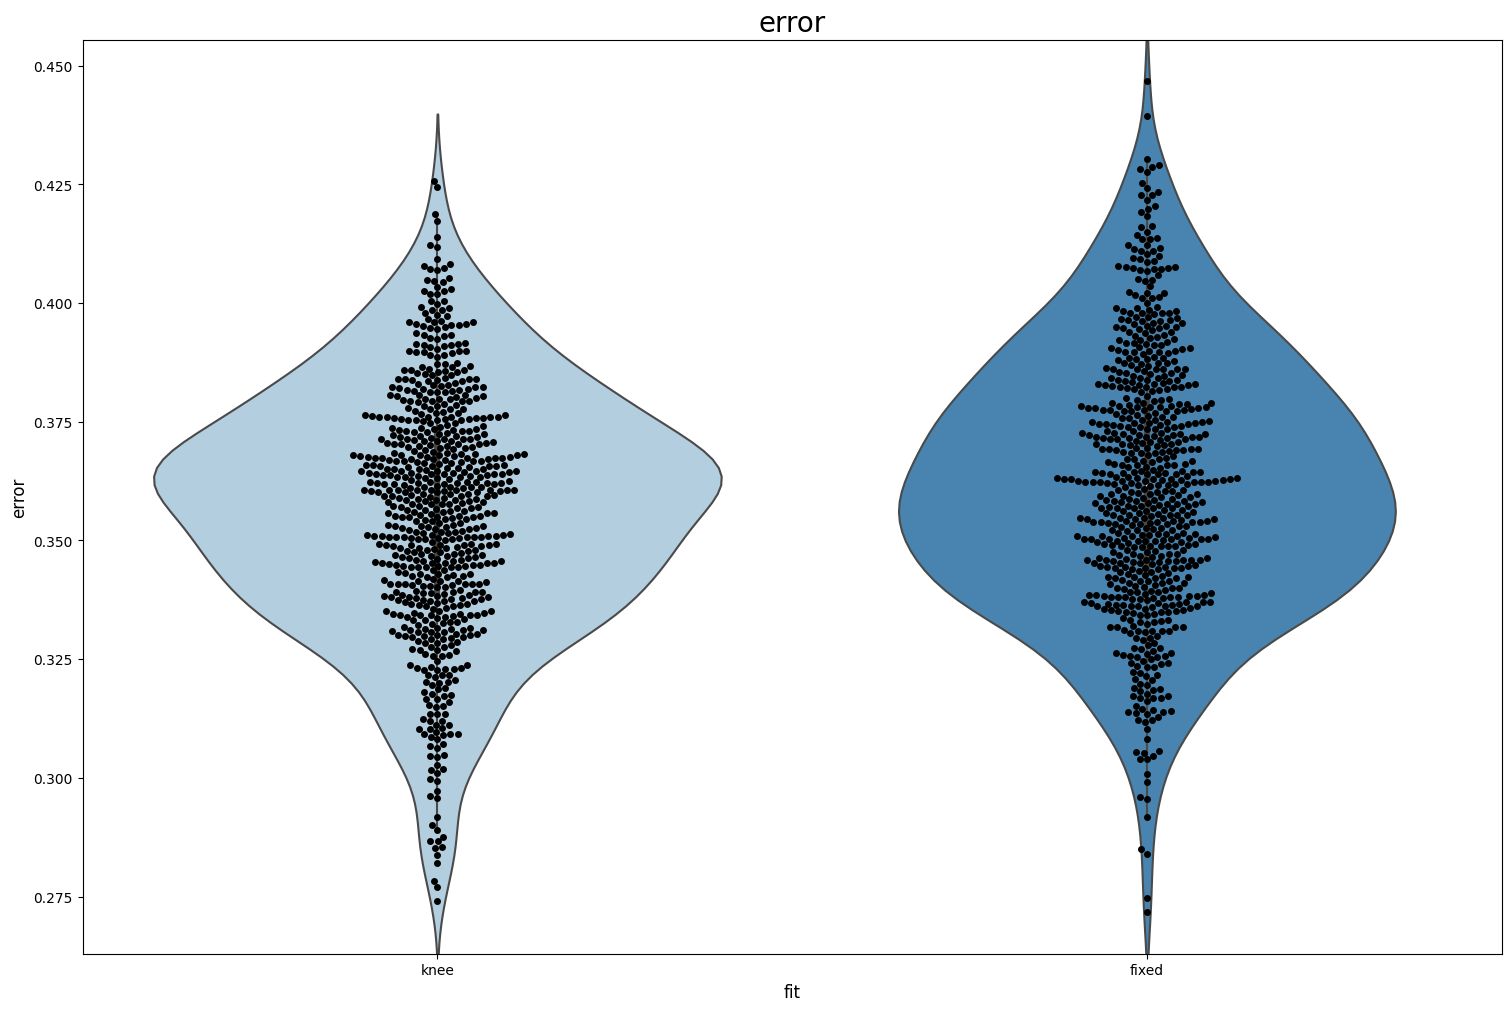

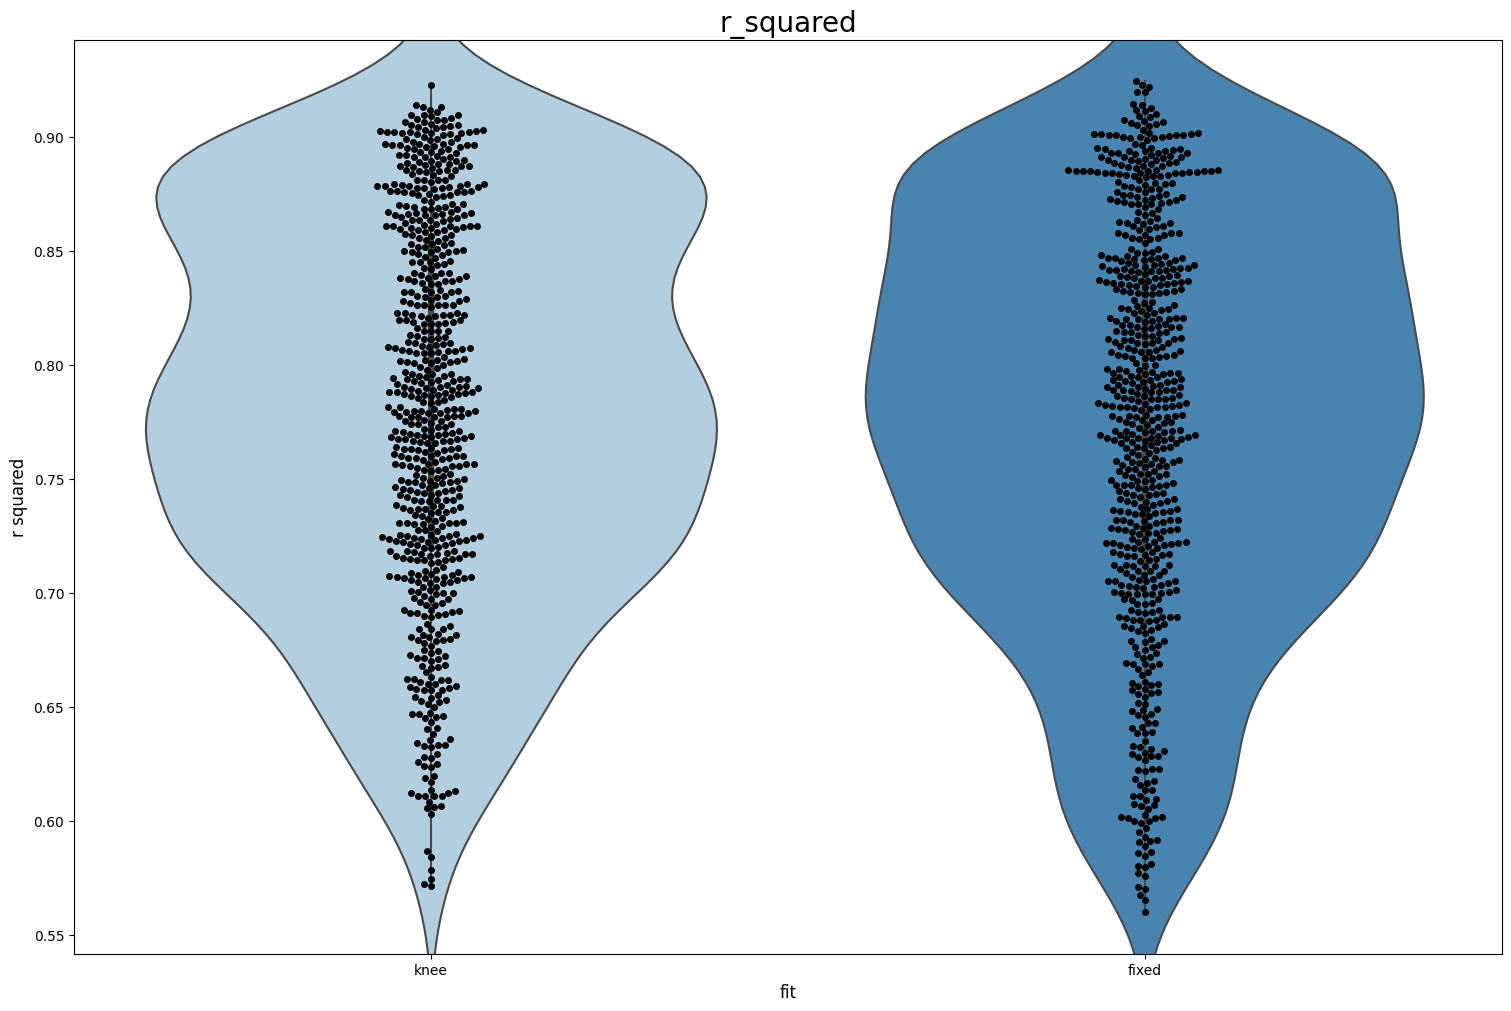

In [ ]:
for metric in metrics:
    # set plotting parameters
    plotting_params = {
        'data':    all_fits,
        'x':       'fit',
        'y':       metric,
    }

    # create figure
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title(f'{metric}')
    vp = sns.violinplot(**plotting_params, ax=ax, palette='Blues')
    sp = sns.swarmplot(**plotting_params, ax=ax, color=[0,0,0], size=5)
    plt.ylabel(' '.join(metric.split('_')))

Text(0.5, 1.0, 'Knee vs. Fixed ERROR')

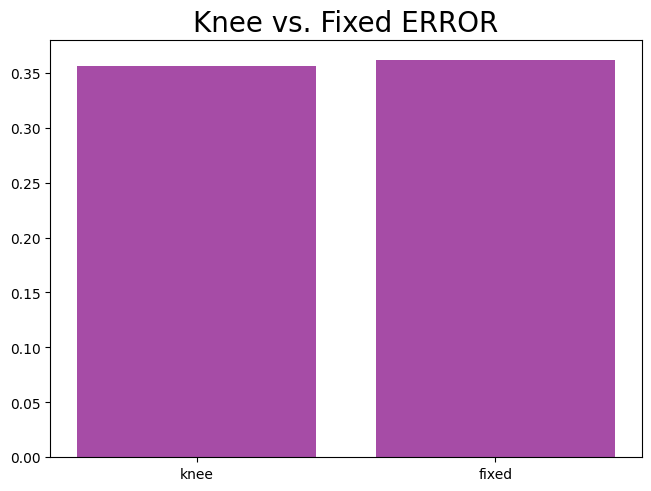

In [ ]:
plt.bar(['knee', 'fixed'], [knee['error'].mean(), fixed['error'].mean()], color='purple', alpha=0.7)
plt.title('Knee vs. Fixed ERROR')

Text(0.5, 1.0, 'Knee vs. Fixed R_SQUARED')

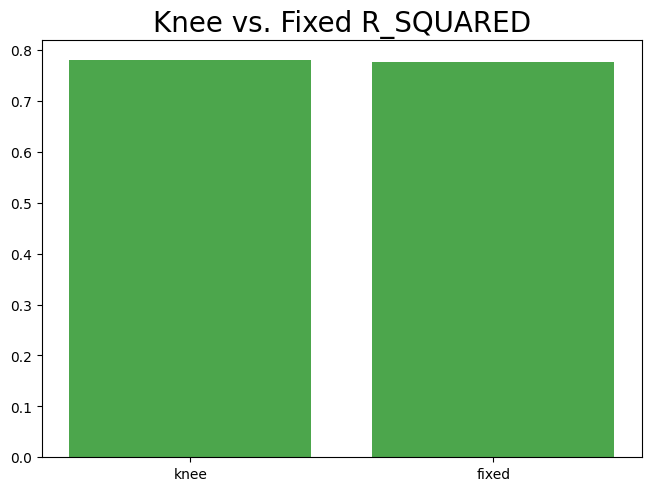

In [ ]:
plt.bar(['knee', 'fixed'], [knee['r_squared'].mean(), fixed['r_squared'].mean()], color='green', alpha=0.7)
plt.title('Knee vs. Fixed R_SQUARED')